In [1]:
!pip install yfinance
!pip install yahoofinancials
import pandas as pd 
import yfinance as yf
from yahoofinancials import YahooFinancials

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 KB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.1/4.1 MB 49.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.2/128.2 KB 11.3 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [47]:
df = yf.download('ADA-USD', start='2015-01-01', end='2022-12-31', progress=False)
df = df.reset_index()
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-11-09,0.025160,0.035060,0.025006,0.032053,0.032053,18716200
1,2017-11-10,0.032219,0.033348,0.026451,0.027119,0.027119,6766780
2,2017-11-11,0.026891,0.029659,0.025684,0.027437,0.027437,5532220
3,2017-11-12,0.027480,0.027952,0.022591,0.023977,0.023977,7280250
4,2017-11-13,0.024364,0.026300,0.023495,0.025808,0.025808,4419440
...,...,...,...,...,...,...,...
1873,2022-12-26,0.259293,0.265307,0.257990,0.265297,0.265297,151542330
1874,2022-12-27,0.265306,0.265969,0.257486,0.260370,0.260370,164331309
1875,2022-12-28,0.260384,0.260842,0.247964,0.248378,0.248378,209596269
1876,2022-12-29,0.248380,0.248460,0.241094,0.244140,0.244140,214425739


In [48]:
df = df[['Date','Close']]
df = df.rename(columns={'Date':'ds','Close':'y'})
df.tail(10)

,ds,y
1868,2022-12-21,0.253154
1869,2022-12-22,0.256523
1870,2022-12-23,0.259429
1871,2022-12-24,0.259368
1872,2022-12-25,0.259270
1873,2022-12-26,0.265297
1874,2022-12-27,0.260370
1875,2022-12-28,0.248378
1876,2022-12-29,0.244140
1877,2022-12-30,0.245557


In [49]:
df = df[:-1]
df

,ds,y
0,2017-11-09,0.032053
1,2017-11-10,0.027119
2,2017-11-11,0.027437
3,2017-11-12,0.023977
4,2017-11-13,0.025808
...,...,...
1872,2022-12-25,0.259270
1873,2022-12-26,0.265297
1874,2022-12-27,0.260370
1875,2022-12-28,0.248378


In [50]:
!pip install NeuralProphet
from neuralprophet import NeuralProphet
from matplotlib import pyplot as pd

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [51]:
m = NeuralProphet()
m.fit(df, freq='D', epochs=100)

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.947% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.947% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.config.init_data_params) - Setting normalization to global as only one dataframe provided for training.
INFO:NP.config:Setting normalization to global as only one dataframe provided for training.
INFO - (NP.utils.set_auto_seasonalities) - Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO:NP.utils:Disabling daily seasonality. Run NeuralProphet with daily_seasonality=True to override this.
INFO - (NP.config.set_auto_batch_epoch) - Auto-set batch_size to 32
INFO:NP.config:Auto-set batch_size to 32
WARNING - (py.warnings._showwarnmsg) - /usr/local/lib/python3.8/dist-packages/torch/cuda/__init__.py:497: UserWarning: 

Finding best initial lr:   0%|          | 0/232 [00:00<?, ?it/s]

Training: 0it [00:00, ?it/s]

,MAE,RMSE,Loss,RegLoss,epoch
0,3.400917,3.961252,0.956996,0.0,0
1,3.238825,3.786134,0.893535,0.0,1
2,2.974276,3.487426,0.791567,0.0,2
3,2.567663,3.034525,0.637439,0.0,3
4,1.994629,2.369675,0.426338,0.0,4
...,...,...,...,...,...
95,0.132634,0.183071,0.003649,0.0,95
96,0.132442,0.182665,0.003643,0.0,96
97,0.132679,0.183186,0.003631,0.0,97
98,0.132497,0.182384,0.003620,0.0,98


In [52]:
future = m.make_future_dataframe(df, periods=120)
forecast = m.predict(future)
forecast.head()

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.947% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.947% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.167% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO:NP.df_utils:Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.167% of the data.
INFO:NP.df_utils:Major frequency D corresponds to 99.167% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is

Predicting: 59it [00:00, ?it/s]

INFO - (NP.df_utils.return_df_in_original_format) - Returning df with no ID column
INFO:NP.df_utils:Returning df with no ID column


,ds,y,yhat1,trend,season_yearly,season_weekly
0,2022-12-30,None,-0.048006,-0.054140,0.009277,-0.003143
1,2022-12-31,None,-0.048775,-0.058176,0.008651,0.000750
2,2023-01-01,None,-0.049835,-0.062212,0.007784,0.004593
3,2023-01-02,None,-0.058550,-0.066248,0.006667,0.001030
4,2023-01-03,None,-0.068158,-0.070284,0.005299,-0.003173


In [53]:
future.tail()

,ds,y
115,2023-04-24,None
116,2023-04-25,None
117,2023-04-26,None
118,2023-04-27,None
119,2023-04-28,None


WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


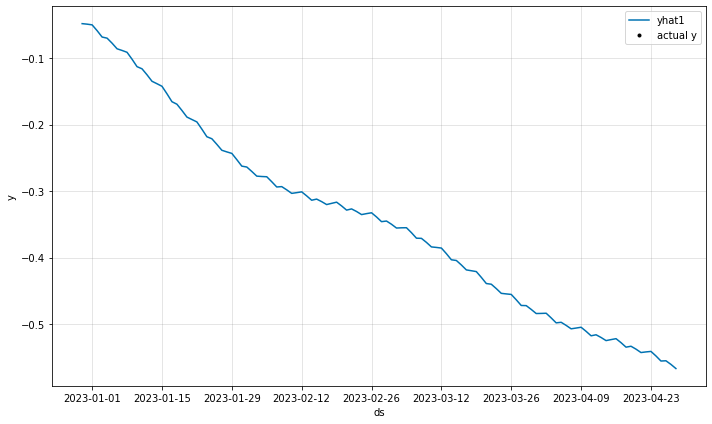

In [54]:
plot1 = m.plot(forecast)

WARNING - (NP.plotting.log_warning_deprecation_plotly) - DeprecationWarning: default plotting_backend will be changed to plotly in a future version. Switch to plotly by calling `m.set_plotting_backend('plotly')`.


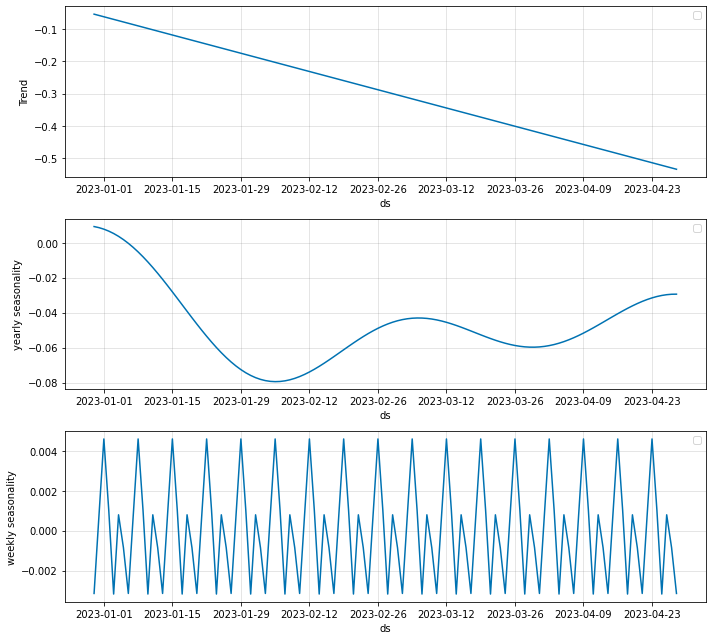

In [55]:
plot2 = m.plot_components(forecast)